<a href="https://colab.research.google.com/github/Jabez-m/Intel-Image-Classification-CNN---Keras-/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import os

In [4]:
gpus=tf.config.experimental.list_physical_devices('GPU')
cpus=tf.config.experimental.list_physical_devices('CPU')

In [5]:
len(cpus)

1

In [6]:
len(gpus)

1

In [7]:
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

Remove Dodgy images

In [8]:
import cv2
import imghdr

In [9]:
img_exts=['jpeg','jpg','png','bmp']

In [10]:
img_exts

['jpeg', 'jpg', 'png', 'bmp']

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
# dir='D:/Academics/Practice/Files/Mood Images'
# dir='https://drive.google.com/drive/folders/1MZUJOtjSWm5_3Llxrw9ex9oJk_2Fan4v?usp=share_link'
dir = '/content/drive/MyDrive/Colab Notebooks/Files/Mood Images'


In [13]:
os.listdir(dir)

['Sad', 'Happy']

In [14]:
# os.listdir(os.path.join(dir, 'Happy'))

In [15]:
img=cv2.imread(os.path.join(dir,'Happy','Travis-Bradberry-Happy.jpg'))

In [16]:
type(img)

numpy.ndarray

In [17]:
img.shape

(420, 640, 3)

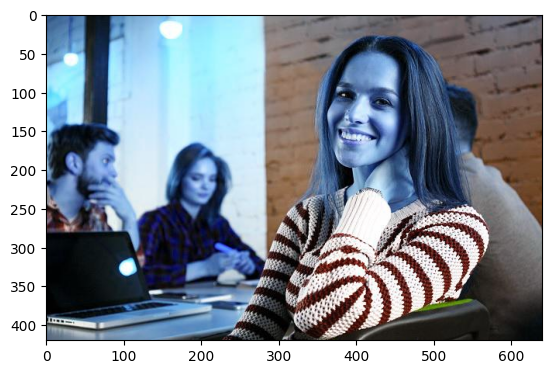

In [18]:
plt.imshow(img)

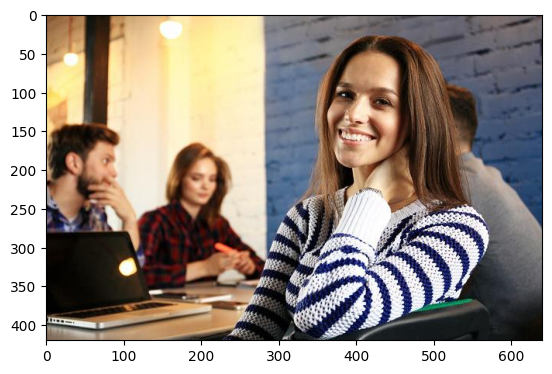

In [19]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
for image_class in os.listdir(dir):
  for image in os.listdir(os.path.join(dir,image_class)):
    image_path=os.path.join(dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in img_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except:
      print('Issue with image {}'.format(image_path))

Load Data

---



In [21]:
# tf.data.Dataset??

In [22]:
# tf.data.Dataset

In [24]:
# tf.keras.utils.image_dataset_from_directory??

In [48]:
data=tf.keras.utils.image_dataset_from_directory(dir,batch_size=32)

Found 156 files belonging to 2 classes.


In [26]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [27]:
data_iterator=data.as_numpy_iterator()

In [28]:
data_iterator

In [29]:
batch=data_iterator.next()

In [30]:
len(batch)

2

In [47]:
# batch[0]

In [33]:
batch[0].shape

(32, 256, 256, 3)

In [35]:
# Class 1=sad
# class 0=happy
batch[1]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int32)

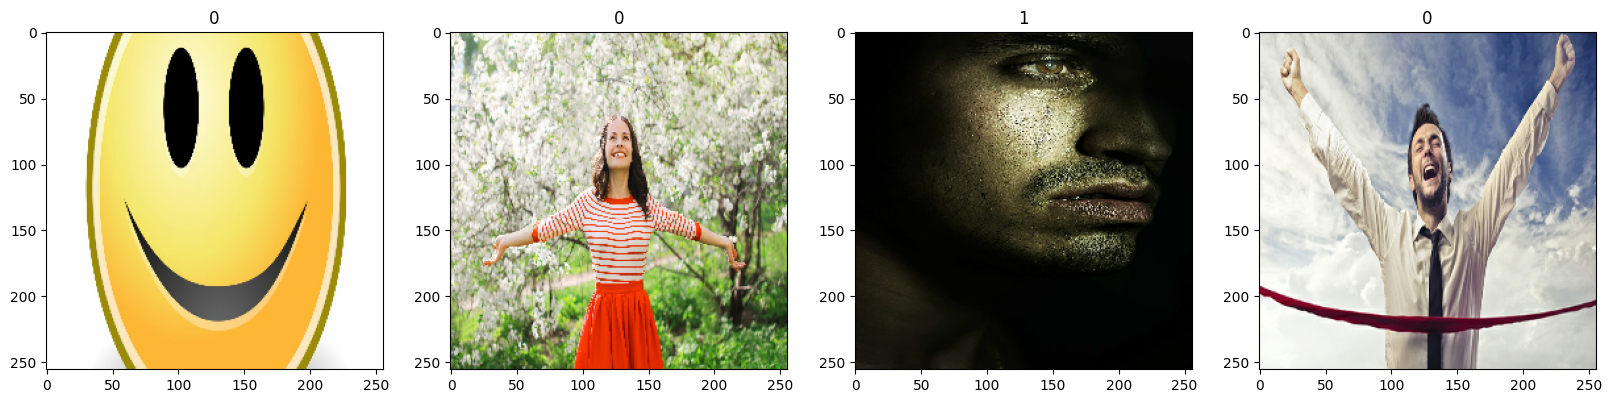

In [37]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Data Preprocessing

In [38]:
batch[0].min()

0.0

In [39]:
batch[0].max()

255.0

In [40]:
scaled=batch[0]/255

In [41]:
batch[0].max()

255.0

In [42]:
# Scale data
data=data.map(lambda x,y:(x/255,y))

In [44]:
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()

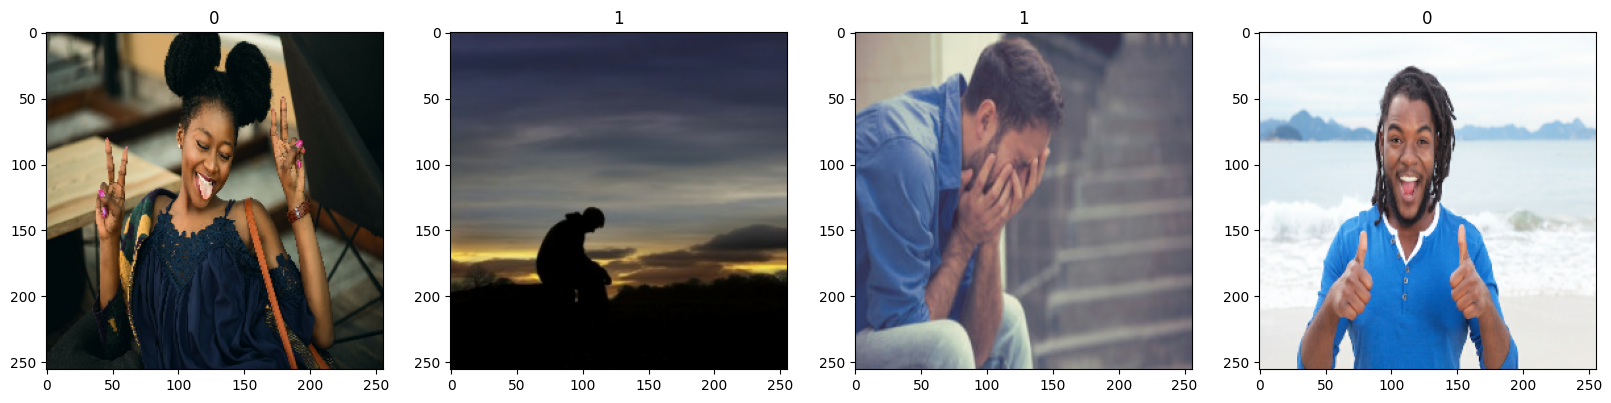

In [46]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [49]:
batch[0].min(),batch[0].max()

(0.0, 1.0)

Split Data

In [50]:
len(data)

5

In [55]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [57]:
test_size,val_size,train_size

(1, 1, 3)

In [58]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

Build Model

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [61]:
# model=Sequential([Conv2D(),])
model=Sequential()

In [62]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [63]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train

In [65]:
logdir='/content/drive/MyDrive/Colab Notebooks/Files/Mood Images/logs'

In [66]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [67]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 22s 2s/step - loss: 333.7344 - accuracy: 0.5938 - val_loss: 380.2700 - val_accuracy: 0.4375
Epoch 2/20
3/3 [==============================] - 6s 1s/step - loss: 205.9709 - accuracy: 0.4896 - val_loss: 38.4634 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 7s 2s/step - loss: 35.3744 - accuracy: 0.5521 - val_loss: 4.3067 - val_accuracy: 0.7812
Epoch 4/20
3/3 [==============================] - 6s 1s/step - loss: 9.8068 - accuracy: 0.5417 - val_loss: 3.7861 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 8s 3s/step - loss: 5.0349 - accuracy: 0.7500 - val_loss: 2.3999 - val_accuracy: 0.7812
Epoch 6/20
3/3 [==============================] - 5s 1s/step - loss: 3.3873 - accuracy: 0.7812 - val_loss: 0.9227 - val_accuracy: 0.9062
Epoch 7/20
3/3 [==============================] - 8s 3s/step - loss: 0.7597 - accuracy: 0.8333 - val_loss: 0.4662 - val_accuracy: 0.7812
Epoch 8/20
3/3 [================

In [69]:
hist.history

{'loss': [333.73443603515625,
  205.97093200683594,
  35.37443161010742,
  9.806801795959473,
  5.034873962402344,
  3.3872616291046143,
  0.7597298622131348,
  0.8734913468360901,
  0.5558066964149475,
  0.43168771266937256,
  0.2913599908351898,
  0.2833234667778015,
  0.2344292253255844,
  0.21883945167064667,
  0.173445925116539,
  0.18587356805801392,
  0.19674831628799438,
  0.15384113788604736,
  0.14381882548332214,
  0.1297711879014969],
 'accuracy': [0.59375,
  0.4895833432674408,
  0.5520833134651184,
  0.5416666865348816,
  0.75,
  0.78125,
  0.8333333134651184,
  0.7395833134651184,
  0.75,
  0.75,
  0.8645833134651184,
  0.875,
  0.9270833134651184,
  0.9583333134651184,
  0.96875,
  0.9791666865348816,
  0.9479166865348816,
  0.9791666865348816,
  0.9791666865348816,
  0.96875],
 'val_loss': [380.26995849609375,
  38.463436126708984,
  4.306661605834961,
  3.7861335277557373,
  2.3998844623565674,
  0.9226828217506409,
  0.46616098284721375,
  0.9365242719650269,
  0.495

Plot Performance

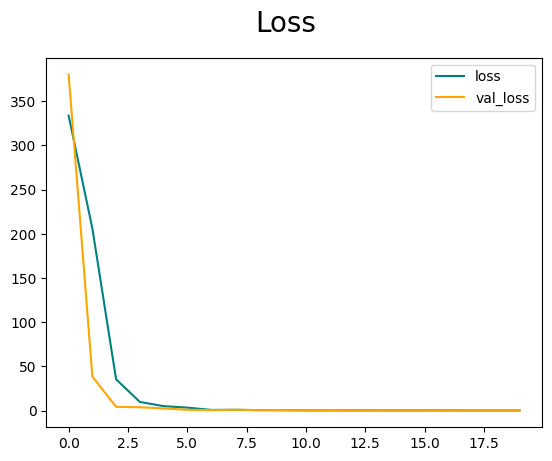

In [71]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper right')
plt.show()

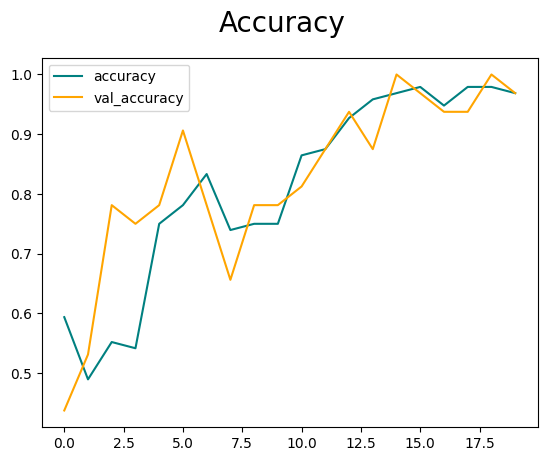

In [73]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

Evaluation

In [74]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [75]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [78]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 435ms/step


In [80]:
print(f'Precision:{pre.result().numpy()}\nRecall:{re.result().numpy()}\nAccuracy:{acc.result().numpy()}')

Precision:1.0
Recall:1.0
Accuracy:1.0


Test

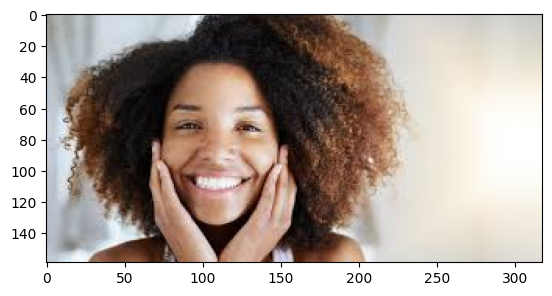

In [93]:
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Files/Mood Images/Happytest/images.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

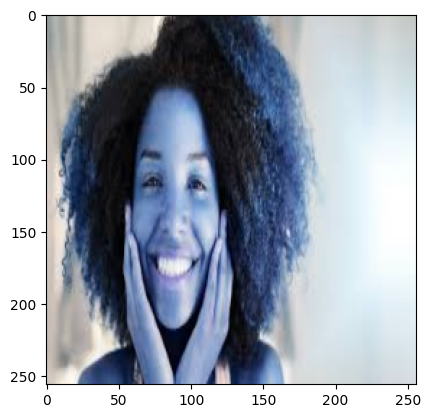

In [94]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [95]:
# np.expand_dims()

In [96]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 19ms/step


In [97]:
yhat

array([[0.4930648]], dtype=float32)

In [98]:
if yhat>0.5:
  print('Sad')
else:
  print('Happy')

Happy


Save model

In [99]:
from tensorflow.keras.models import load_model

In [100]:
model.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/Files/Models','happySad.h5'))

In [101]:
# Reload model
new_model=load_model(os.path.join('/content/drive/MyDrive/Colab Notebooks/Files/Models','happySad.h5'))